In [180]:
def ideal_current_sheet(pos):
    z       = pos[2]
    delta_2 = 0.1
    B0      = 15.0
    Bx      = 0.0
    Bz      = 0.0
    slope   = B0/delta_2
        
    if z < -delta_2:
        By = B0
    elif z > delta_2:
        By = -B0
    elif np.abs(z) <= delta_2:
        By = -1.0*slope*z
        
    return [Bx,By,Bz]

In [189]:
def rotate_vector(psi,theta,phi,vec):
    Tx = np.array([[1.0,0,0],[0,np.cos(psi),np.sin(psi)],[0,-np.sin(psi),np.cos(psi)]])
    Ty = np.array([[np.cos(theta),0,-np.sin(theta)],[0,1.0,0],[np.sin(theta),0,np.cos(theta)]])
    Tz = np.array([[np.cos(phi),np.sin(phi),0],[-np.sin(phi),np.cos(phi),0],[0,0,1]])
    
    Tot = Tz.dot(Ty.dot(Tx))
    
    return Tot.dot(vec)

In [181]:
def staight_up(t,vz):
    return np.array([0,0,vz*t])

In [182]:
def twisted_cubic(t):
    return np.array([t,t*t,t*t*t])

In [183]:
def MVA_cov(B):
    Bx = B[:,0]
    By = B[:,1]
    Bz = B[:,2]
    
    Cov_xx = np.mean(Bx*Bx) - np.mean(Bx)*np.mean(Bx)
    Cov_xy = np.mean(Bx*By) - np.mean(Bx)*np.mean(By)
    Cov_xz = np.mean(Bx*Bz) - np.mean(Bx)*np.mean(Bz)
    Cov_yy = np.mean(By*By) - np.mean(By)*np.mean(By)
    Cov_yz = np.mean(By*Bz) - np.mean(By)*np.mean(Bz)
    Cov_zz = np.mean(Bz*Bz) - np.mean(Bz)*np.mean(Bz)
    
    return np.asarray([[Cov_xx,Cov_xy,Cov_xz],[Cov_xy,Cov_yy,Cov_yz],[Cov_xz,Cov_yz,Cov_zz]])

In [184]:
t = np.linspace(-2,2,100)

In [201]:
psi   = np.pi/3.0
theta = np.pi/7.0
phi   = -np.pi/4.0
B_tc = []
B_su = []
for instant in t:
    B_tc.append(rotate_vector(psi,theta,phi,ideal_current_sheet(twisted_cubic(instant))))
    B_su.append(rotate_vector(psi,theta,phi,ideal_current_sheet(staight_up(instant,0.15))))
B_tc = np.asarray(B_tc)
B_su = np.asarray(B_su)

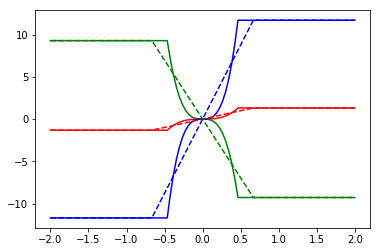

In [202]:
plt.plot(t,B_tc[:,0],'r-')
plt.plot(t,B_tc[:,1],'g-')
plt.plot(t,B_tc[:,2],'b-')
plt.plot(t,B_su[:,0],'r--')
plt.plot(t,B_su[:,1],'g--')
plt.plot(t,B_su[:,2],'b--')

In [203]:
MVA_cov(B_tc)

array([[   1.39605715,   -9.84020777,   12.39873517],
       [  -9.84020777,   69.35940207,  -87.39336389],
       [  12.39873517,  -87.39336389,  110.11629028]])

In [204]:
MVA_cov(B_su)

array([[   1.35494618,   -9.55043422,   12.03361834],
       [  -9.55043422,   67.31691266,  -84.819812  ],
       [  12.03361834,  -84.819812  ,  106.87359571]])

In [205]:
np.linalg.eig(MVA_cov(B_tc))

(array([  0.00000000e+00,   1.80871749e+02,  -2.08649962e-14]),
 array([[-0.99613328, -0.08785495, -0.00471863],
        [-0.05461552,  0.61925183,  0.7830232 ],
        [ 0.06881596, -0.78026193,  0.6219746 ]]))

In [206]:
np.linalg.eig(MVA_cov(B_su))

(array([  0.00000000e+00,   1.75545455e+02,   1.85096352e-14]),
 array([[-0.99613328, -0.08785495, -0.07198812],
        [-0.05461552,  0.61925183,  0.77729568],
        [ 0.06881596, -0.78026193,  0.62500331]]))